#### # 학습 시 참고한 URL : https://datascienceschool.net

### # 나이브 베이즈 모형

- 나이브가정 : 

독립 변수  x 가 다차원이면 즉, $$\ x = (x_1, \ldots, x_D) $$이면 가능도 $$\ P(x \mid y = k) $$로 모든 $$\ x = (x_1, \ldots, x_D) $$에 대한 결합확률 $$\ P(x_1, \ldots, x_D \mid y = k) $$ 을 사용해야 한다.

1) 차원이 높아질수록 다차원 결합확률은 실제로 구하기 어렵기 때문에 모든 차원의 개별 독립변수 요소들이 서로 조건부 독립이라는 가정이다.


2) QDA와 LDA에서는 독립변수 x가 매우 커지면 공분산행렬 역시 너무 커지게 된다. 그래서 나온 아이디어가 공분산 행렬의 비대각 성분을 전부 0이라고 가정하는 것이다. 다시말해 모든 차원의 개별 독립변수 요소들이 상관관계가 없다는 것을 가정한다.


- 나이브가정은 사실상 비현실적인 가정이지만 데이터가 너무 많아지게 부정확해지기 때문에 그런 부정확한 숫자를 쓰느니 차라리 0이라고 가정해서 부정확성을 극복하겠다는 의도다.


- 따라서 QDA와 LDA에서는 x1, x2, x3.. xD 이런 얘들이 상관관계가 있었는데 나이브 베이즈 모델에서는 상관관계가 없는 독립적인 데이터라고 가정한다. 서로 독립이면 확률분포함수는 각각의 분포함수의 곱으로 나타내게 된다. 그래서 QDA 같은 경우에는 다변수 가우시안 노말 분포로 전체를 다 구했지만 나이브베이즈인 경우는 x1에 대한 분포 하나 구하고, x2 에 대한 분포 하나구하고, ... , xD에 대한 분포를 각각 다 따로 구한다.


- 수식으로 표현하면 다음과 같다.

$$\ P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k) $$


$$\ P(y = k \mid x) \;\; \propto \;\; \prod_{d=1}^D P(x_{d} \mid y = k)\; P(y = k) $$


- 독립변수 x가 그냥 독립은 아니고 y가 어떤 클래스라는 조건하에 독립이다. 이말은 독립변수 x가 무조건부로 독립이 아닐수도 있다는 것이다.


- 그렇다면 가우시안 분포를 써야하는 연속적인 값들 예를들어 길이나 무게 같은 것들은 그냥 1차원 가우시안 함수로 구하면 끝이다. 그러면 평균과 표준편차만 구하면 끝나는 것이다. 예를 들어 x1에 대해 평균과 표준편차만 따로 구하고, x2에 대해 평균과 표준편차만 따로 구하면 된다는 것이다.


- QDA -> (간략화) -> LDA -> (간략화) -> 나이브 베이즈


- 이렇게 x를 분리시키면 기존에 QDA와 LDA에는 없는 장점이 생긴다. x1 따로 떨어지고 x2 따로 떨어지고 이러면 x1은 x1에 잘 맞는 모델을 선택하고, x2는 x2에 잘 맞는 모델을 선택할수 있다. 반드시 모델을 일괄적으로 가우시안 노멀을 써야한다는 그 제한조건이 없어지게 된다. 이 말은 연속적인 값이 아닌 이산적인 값들에 대해서도 잘 맞는 모델을 선택할 수 있다는 말이다. QDA나 LDA인 경우에는 x가 이산값인 경우는 모델링을 할 수 없었다 왜냐하면 분포가 가우시안 노멀분포이기 때문이다. 그러나 차피 x1따로, x2따로, x3따로 각각 모델링을 해야하니 사용자가 원하는 모델링을 할 수 있다. 그래서 이산분포 다시말해 베르누이 분포 다항분포 이런것들도 얼마든지 적용이 가능하다.


- 그래서 만약에 특정 x데이터를 가우시안 분포를 적용하고 싶다면 다음과 같이 우리가 알고 있는 가우시안 노멀 수식을 적용하면 된다. 

$$\ P(x_d \mid y = k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right) $$ 

- 그리고 우리는 각 독립 변수  xd 마다, 그리고 클래스  k 마다 정규 분포의 기댓값 뮤와 표준편차 시그마 제곱만 추정하면 된다. 뮤는 다 더해서 샘플 평균구하면 되고 시그마 제곱은 샘플 표준편차 구하면 된다. 다만 x1 따로 구해야 하고, x2 따로 구해야 하고 그리고 x1에 대해서도 클래스 1일때 따로 구해야하고 클래스 2일때 따로 구해야하고 이런식으로 다 따로 구해줘야 한다.


- 그리고 위에서 언급한것처럼 반드시 연속적인 값만 아니어도 되니까 이산적인 값도 쓸 수 있다. 베르누이분포 같은것도 쓸 수 있게 된다. 베르누이 분포는 x가 0과 1 밖에 없는 케이스이다. x가 0과 1밖에 없는 케이스가 언제 많이 생기냐면 우리가 텍스트 분석을 하게 되면 bag of words 방식을 자주 쓰는데 특정 단어가 있냐 없냐 이렇게 판단하기 때문에 그런경우에는 베르누이 분포로 모델링을 해주면 된다.


- 텍스트 분석을 하게 되면 실제 x값이 몇개가 나오게 되냐면 1000개 정도가 아니라 10000개 이상이 나올 수도 있다. 그리고 우리가 바이그램 모델같은것을 쓰게 되면 10만개 이상도 충분이 나오는 경우가 있을 수 있다. x가 10만개 이상이 넘어가게 되면 QDA나 LDA로는 감당이 안된다. 따라서 이런 텍스트 분석 같은 경우에는 x의 분포를 베르누이 분포로 가정하고 풀게 되면 이런 나이브 베이즈 모형이 가장 적합하다고 할 수 있다.


- 그래서 우리가 추정해야 할 것은 x가 0이나 1이 나오게 하는 동전의 뮤값을 추정하면 된다. 이 뮤값이 클래스 k마다 다를 것이고 x1에 따라 다르고, x2에 따라 다르고, x3에 따라 다르고 다 다르기 때문에 다 따로 추정을 해야한다.


- 그리도 다음과 같은 케이스인 경우도 있다. 우리가 bag of words 방식을 쓸때 있으면 1 없으면 0 이런식으로 보통하지는 않았다. 있으면 몇번 내왔는지 이런 경우가 보통이다. 예를 들어서 어떤 A문서에서는 1번 단어가 2번, 2번단어가 8번, 3번 단어가 6번, B문서에서는 1번 단어가 0번, 2번단어가 9번, 3번 단어가 5번, C문서에서는 1번 단어가 3번, 2번단어가 5번, 3번 단어가 4번 이런경우를 말하는 것이다. 


- 이렇게 x가 0 또는 자연수를 갖는 경우에는 1번단어 주사위, 2번단어 주사위, 3번 단어 주사위를 한꺼번에 묶은 다음에 이걸 하나의 주사위라고 본다. 이런식으로 모델링을 하는 것이 다항분포 모델링이다. 


- 방금 언급했었던 가우시안 노멀이나 베르누이에서는 x끼리 완전히 따로 분리를 했지만 다항분포에서는 x를 분리하지 않고 오히려 하나로 묶어버린다.


- 각 클래스마다 주사위가 다르다고 가정하므로  K 개의 클래스를 구분하는 문제에서는  D 개의 면을 가진 주사위가  K 개 있다고 본다. 수식으로 표현하면 다음과 같다.

$$\ P(x_1, \ldots, x_D \mid y = k) 
\;\; \propto \;\; \prod_{d=1}^D \mu_{d,k}^{x_{d,k}} $$

$$\ N_k = \sum_{d=1}^{D} x_{d,k} $$

$$\ \sum_{d=1}^{D} \mu_{d,k} = 1 $$


- 우리가 이렇게 나이브한 가정을 하므로써 약점이 있지만 x에 대해서 우리가 원하는대로 확률분포를 골라서 쓸 수 있다는 장점을 얻게된다. 그래서 우리는 이런 문제도 풀 수 있다. 

#### # 베르누이 분포 나이브 베이즈 모형을 이용한 스팸필터링 문제

다음은 스팸문자를 걸러내는 문제로 종속변수 y = 1인경우는 스팸메일, y=0은 정상메일을 말한다.

x행렬에서 예를들어 1번 메일은 x1 = [1, 0, 1], 2번 메일은 x2 = [1, 0, 1], 3번 메일은 x3 = [1, 1, 0]을 말한다.

키워드 단어를 3개를 잡은것이다. 어떤 메일에 첫번째 키워드만 있으면 [1,0,0], 어떤 메일에 두번째 키워드만 있으면 [0,1,0], 어떤 메일에 첫번째 키워드와 두번째 키워드가 있으면 [1,1,0] 이런식이다.

이런식으로 bag of words 방식으로 6개의 메일을 다 분석한 결과가 x이다. 그리고 정상메일이냐 스팸메일이냐 라벨링을 해놓은 것이 y이다.

만약에 주어진 메일이 다음과 같다고 치자.

$$\ x = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$ , $$\ y = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 1 \\ 1 \end{bmatrix} $$ , x_test = [ 1  1  1 ], 스무딩 $$\ \alpha $$ = 1 일때


### 문제1) 

$\ \mu $ 세트를 구해라

### 문제2) 
x_test가 위와 같을때 이 x_test는 스팸메일인가 정상메일인가 확률을 구해라(스무딩 $\ \alpha $ = 1로 적용할 것)

#### 문제풀이

위의 메일을 나이브 베이즈 모형을 모델링하게 되면 첫번째 열은 첫번째 키워드가 있냐 없냐를 0과 1로 나타낸 것이다. 이 데이터를 베르누이 확률모형 다시말해 동전으로 모델링 하면 된다. 몇개의 동전이 필요하냐면 클래스 2개 x 모델링 3개(x1 모델링, x2 모델링, x3모델링) 총 6개가 필요하다.

그래서 이걸 베르누이 나이브 베이즈 모형으로 fitting하면 된다.

#### 스무딩

스무딩은 동전의 각 면 즉, 0과 1이 나오는 가상의 데이터를 추가함으로서 추정한 모수의 값이 좀 더 0.5에 가까워지도록 하는 방법이다.

예를 들어서 우리가 조사한 6개의 메일에 대해 첫번째 키워드가 전부 존재한다고 가정하면 우리가 앞으로 예측할때도 100%의 확률로 첫번째 키워드가 무조건 나온다고 확신할 수 없기 때문이다. 우리의 머리속에는 베르누이 분포라는 것이 쉽게 말해 동전이라는 것은 기본적으로 0.5로 되어 있는 것이 보통의 상식이기 때문이다. 이 사전지식과 결합을 하는 과정이 스무딩이라고 할 수 있다.

어떻게 결합을 시키냐 실제로는 우리가 클래스별로 각각 3번씩 주사위를 던진 것인데 여기에다가 가짜데이터를 추가를 한다. [1,1,1]과 [0,0,0]을.. 이렇게 되면 우리는 클래스별로 각각 주사위를 5번 던지게 되는 것이다.

이렇게하게되면 뮤가 0.5에 약간 가까워지는 동전이 된다. 다시말해 0.5쪽으로 다가가게 된다.

이 스무딩의 정도는 사용자가 조절 할 수 있다. 내가 봤을때 이 주사위가 0.5에 정말 가까운 동전이다라고 생각한다면 fair한 데이터를 추가로 더 삽입할 수 있다. 그러면 더 0.5에 다가갈 것이다. 이것을 나타내는 것이 알파이다. 알파값이 1이라는 것은 한세트의 fair한 데이터를 집어넣은 것이고 알파가 2인 것은 두세트를 집어 넣은 것이다.

#### step1) 스무딩 $\ \alpha $ = 1를 적용한 x_new 메트릭스 생성

$$\ x.new = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \\ 1 & 1 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

#### step2) x_new 메트릭스를 바탕으로 $\ \mu $ 세트 계산

$$\ \mu = \begin{bmatrix} 4/5 & 2/5 & 3/5 \\ 1/5 & 2/5 & 4/5 \end{bmatrix} $$

이렇게 모델이 완성이 되었다면 모델에 x_test = [ 1 1 1 ]를 넣고 prediction을 할 수 있다.

#### step3) x_test의 클래스별 각 확률 구하기
- 여기서 사전확률(p(y=0), p(y=1))은 각각 1/2이다. 따라서

$$\ P( y = 0 \mid Xtest) \propto P(Xtest \mid y = 0)P(y=0) $$

= (4/5) * (2/5) * (3/5) * (1/2)

= 0.75


$$\ P( y = 1 \mid Xtest) \propto P(Xtest \mid y = 1)P(y=1) $$ 

= (1/5) * (2/5) * (4/5) * (1/2)

= 0.25

결론적으로 x_test는 0.75의 확률로 정상메일이라고 할 수 있다.

#### # 다항분포 나이브 베이즈 모형을 이용한 스팸필터링 문제

- 베르누이나 가우시안 노멀 분포는 x1만 따로 모델링하고, x2만 따로 모델링한 다음에 그냥 곱했는데 다항분포에서는 따로따로 뜯어내지 않고 x데이터가 한 세트라고 가정한다.


- 예를 들어서 다음과 같은 스팸메일 데이터가 있다고 하자

In [1]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

- 베르누이 같은 경우에는 키워드가 나왔으면 1, 안나왔으면 0으로 표시했는데 다항분포에서는 그 키워드가 나온 횟루를 표시했다. 


- 이렇게 횟수로하게 되면 주사위로 한것과 같은 것이다. 1번 메일을 예로 들면 주사위를 10번 던져서 첫번째 키워드가 3번 , 두번째 키워드가 4번, 3번째 키워드가 1번, 4번째 키워드가 2번 나온것이다. 참고로 키워드가 더해져서 모두 같은숫자로 일괄적으로 같을 필요는 없다. 예를 들어서 1번 메일은 주사위가 10개라면 2번메일은 주사위가 15개가 될 수도 있고 20개가 될 수도 있다.


- 이처럼 이 키워드 4개를 갖다가 하나의 주사위로 두고 모델링을 하면된다. 여기서는 예를들어 4면체 주사위가 있는 것이다. 위의 예시의 베르누이에서는 동전이 3개가 있었다면 여기서는 4면체 주사위라는 것이다. 


- 차이점은 동전 3개가 있을때는 각각의 뮤를 다 독립적이기 때문에 이 뮤를 전부 더한다고해서 1이 될 보장이 없다. 그런데 이 4면체의 면을 나타내는 뮤값은 모두 더해서 1이 되야 한다.


- 이 4면체 주사의 뮤를 구해보면 뮤1은 토탈 40번 던진 것이다. 따라서 여기서 분모가 되는 N은 40인 것이고 키워드 1은 12번 나온 것이다. 그러면 12/40 이 되는 것이다. 뮤2는 16/40, 뮤3는 3/40, 뮤4는 9/40이 되는 것이다. 따라서 이 뮤가 전부더해지면 1이된다.


- 따라서 이걸 구하면 정상메일을 생성하는 주사위 모형을 만든것이다. 요방법을 스팸메일일때도 마찬가지로 구해주면 된다.


- 이 다항분포도 마찬가지로 스무딩을 할 수 있다. 스무딩을 하게되면 fair한 주사위 다시말해 0.25, 0.25, 0.25, 0.25의 방향으로 갈 것이다.


- 그 다음에 뮤1 = 12/40, 뮤2 = 16/40, 뮤3 = 3/40, 뮤4 = 19/40 이놈들을 다음과 같이 계산하면 주어진 데이터에 대한 정상메일을 분류하는 모델을 만든것이다. 뮤1의 10승 x 뮤2의 10승 x 뮤3의 10승 x 뮤4의 10승

### 연습 문제 1

붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.

1. confusion matrix
2. classification report
3. ROC curve
4. AUC

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from patsy import *
import statsmodels.api as sm
import scipy as sp
import seaborn as sns

from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(iris.data, iris.target)

model_norm.classes_

array([0, 1, 2])

In [6]:
model_norm.class_count_

array([50., 50., 50.])

In [7]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [8]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [9]:
model_norm.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.metrics import confusion_matrix

y_true = iris.target
y_pred = model_norm.predict(iris.data)
confusion_matrix(y_true, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



auc[0] :  1.0
auc[1] :  0.9818
auc[2] :  0.989


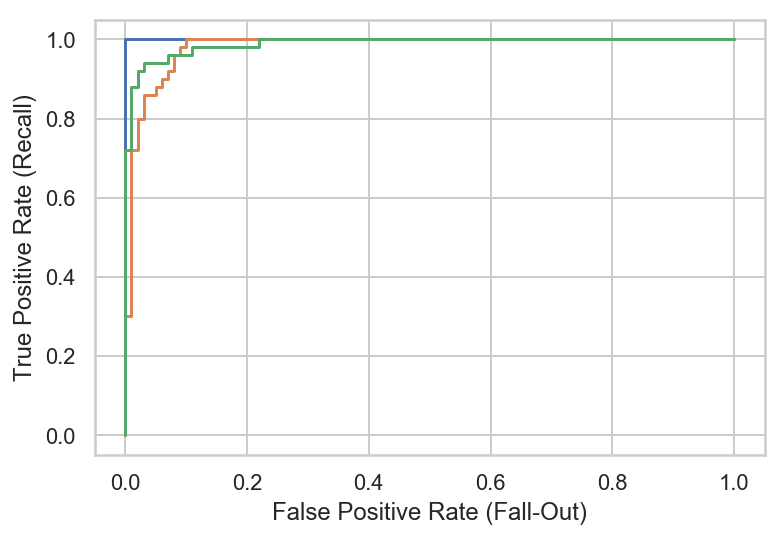

In [12]:
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    result = model_norm.fit(iris.data, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], result.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    print("auc[{}] : ".format(i), auc(fpr[i], tpr[i]))

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

### 연습 문제 2

붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.

1. MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.


2. BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.


3. 계산된 모형의 모수 벡터 값을 각 클래스별로 8*8 이미지의 형태로 나타낸다. 이 이미지는 무엇을 뜻하는가?

#### 2-1번문제

In [16]:
from sklearn import datasets
digits = datasets.load_digits()

from sklearn.preprocessing import Binarizer

X = digits.data
y = digits.target

binarizer = Binarizer(8).fit(X) 
X_new = binarizer.transform(X)

from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X_new, y)

y_true = digits.target
y_pred = model_bern.predict(X_new)
confusion_matrix(y_true, y_pred)

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]], dtype=int64)

In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.82      0.80      0.81       182
           2       0.89      0.88      0.88       177
           3       0.95      0.85      0.89       183
           4       0.97      0.93      0.95       181
           5       0.92      0.91      0.91       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.81      0.80      0.81       174
           9       0.79      0.90      0.84       180

   micro avg       0.90      0.90      0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



#### 2-2번문제

In [19]:
model_bern = BernoulliNB(binarize=8).fit(digits.data, digits.target)

y_true = digits.target
y_pred = model_bern.predict(X)
confusion_matrix(y_true, y_pred)

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]], dtype=int64)

In [20]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.82      0.80      0.81       182
           2       0.89      0.88      0.88       177
           3       0.95      0.85      0.89       183
           4       0.97      0.93      0.95       181
           5       0.92      0.91      0.91       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.81      0.80      0.81       174
           9       0.79      0.90      0.84       180

   micro avg       0.90      0.90      0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



#### 2-3번문제

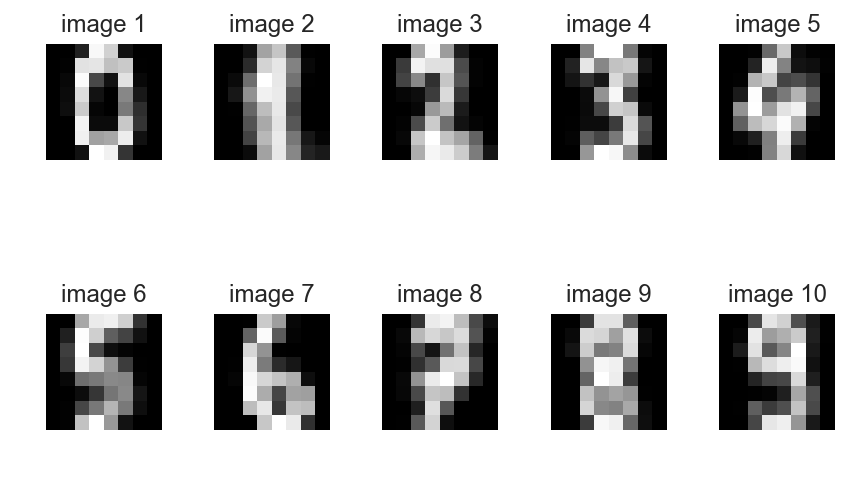

In [31]:
model_bern = BernoulliNB(binarize=8).fit(digits.data, digits.target)

temp = model_bern.predict(digits.data)

theta = np.exp(model_bern.feature_log_prob_)

from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(theta[i].reshape(8,8), cmap='gray')
    plt.grid(False)
    plt.title("image {}".format(i + 1))
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [23]:
temp[0]

array([[0.00555556, 0.00555556, 0.12777778, 0.95555556, 0.80555556,
        0.07222222, 0.00555556, 0.00555556],
       [0.00555556, 0.01666667, 0.87222222, 0.88333333, 0.73888889,
        0.77777778, 0.01111111, 0.00555556],
       [0.00555556, 0.03888889, 0.96666667, 0.28333333, 0.07222222,
        0.87222222, 0.03888889, 0.00555556],
       [0.00555556, 0.05      , 0.85      , 0.07777778, 0.00555556,
        0.52222222, 0.1       , 0.00555556],
       [0.00555556, 0.06111111, 0.77777778, 0.02777778, 0.00555556,
        0.47222222, 0.18333333, 0.00555556],
       [0.00555556, 0.00555556, 0.93888889, 0.05      , 0.05      ,
        0.77222222, 0.21111111, 0.00555556],
       [0.00555556, 0.00555556, 0.92222222, 0.62222222, 0.65      ,
        0.91111111, 0.07222222, 0.00555556],
       [0.00555556, 0.00555556, 0.07222222, 0.98333333, 0.92777778,
        0.20555556, 0.00555556, 0.00555556]])

In [24]:
X_new[0]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

### 연습 문제 3

MNIST Digit 분류 문제를 다항분포 나이브 베이즈 모형을 사용하여 풀고 Binarizing을 하여 베르누이 나이브 베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [26]:
from sklearn.naive_bayes import MultinomialNB
model_bern = MultinomialNB().fit(digits.data, digits.target)

y_true = digits.target
y_pred = model_bern.predict(X)
confusion_matrix(y_true, y_pred)

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

   micro avg       0.91      0.91      0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



### 연습 문제 4

텍스트 분석에서 TF-IDF 인코딩을 하면 단어의 빈도수가 정수가 아닌 실수값이 된다. 이런 경우에도 다항분포 모형을 적용할 수 있는가?

#### 정답 : 

가능하다. 예를들어 소수점 한자리로 나오게 되면 10을 곱해서 하면된다. 차피 비율의 문제기 때문에..

실제로도 정수가 아닌값을 집어넣어도 결과가 나온다.

### 연습 문제 5

만약 x 값이 실수 변수, 0/1 값을 가지는 변수, 일정 변수 집합이 특정한 분포를 이루는 변수들이 섞여있다면 어떻게 풀어야 하는가?

#### 정답 : 

가능하다.

만약에 x가 총 100개가 있다고 치자

여기서 1 ~ 20번 x는 연속적인 실수값으로 이루어져있고,
21 ~ 50번 x는 0과 1로만 이루어져 있고,
51 ~ 100번 x는 0보다 큰 자연수로 이루어져 있다면

1 ~ 20은 가우시안 베이즈 모델에 넣고, 21 ~ 50번은 베르누이 베이즈 모델, 51 ~ 100번은 다항분포 베이즈 모델에 넣으면 된다. 그러면

$\ P(y=0 \mid X1:100) $ 

= $\ P(X1:100 \mid y=0)P(y) $ 

= $\ P(X1:20 \mid y=0)$ * $\ P(X21:50 \mid y=0) $ * $\ P(X51:100 \mid y=0) $ 

로 풀 수 있다.

### 연습문제 6

- 다항분포의 나이브베이즈 모형에 관련된 문제이다. 독립변수가 아래와 같이 있고, 클래스는 0과 1이 있을때 다음 질문에 답하여라.

[3, 4, 1, 2] = 클래스 0

[3, 5, 1, 1] = 클래스 0

[0, 1, 2, 5] = 클래스 1

[1, 1, 4, 2] = 클래스 1

In [3]:
x = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [0, 1, 2, 5],
    [1, 1, 4, 2]
])

y = np.array([0, 0, 1, 1])

from sklearn.naive_bayes import MultinomialNB

model_mult = MultinomialNB().fit(x, y)

model_mult.class_count_

array([2., 2.])

In [5]:
fc = model_mult.feature_count_
fc

array([[6., 9., 2., 3.],
       [1., 2., 6., 7.]])

- 이 데이터에서 클래스 y=0인 주사위를 던져 1이라는 면이 나올 확률은?

정답 : ($\\mu_{1}$, y=0) = 1/20 = 0.05

- 이 데이터에서 각 클래스의 주사위가 나올 확률은 다음과 같다. alpha = 1 로 스무딩했다면 각 확률은 어떻게 되겠는가?

In [7]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3   , 0.45  , 0.1   , 0.15  ],
       [0.0625, 0.125 , 0.375 , 0.4375]])

In [9]:
( fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * x.shape[1])

array([[0.29166667, 0.41666667, 0.125     , 0.16666667],
       [0.1       , 0.15      , 0.35      , 0.4       ]])